In [18]:
#Warning showing in loading tops3(D1,D2,D3) countries seperately
import warnings
warnings.filterwarnings('ignore')

#Import the numpy and pandas packages
import numpy as np
import pandas as pd

In [19]:
#Reading compaines.txt, changing the encoding type because of special characters
#and multiple encoding issue.
companies = pd.read_csv('companies.txt',encoding='ISO-8859-1',sep='\t')
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.head()
#as we can see that there are many special charactes and NAN values are in table so step by step needs to be rectify 

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [20]:
#Reading rounds2.csv, changing the encoding type because of special characters
#and multiple encoding issue.
rounds2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [21]:
#unique companies are present in rounds2
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
print(len(rounds2['company_permalink'].unique()))
#using nunique() removes NAN and gives the unique value

66368


In [22]:
#unique companies are present in companies
companies['permalink'] = companies['permalink'].str.lower()
print(len(companies['permalink'].unique()))

66368


In [23]:
#are there any companies in the rounds2 file which are not present in companies?
t1 = pd.DataFrame(rounds2.company_permalink.unique())
t2 = pd.DataFrame(companies.permalink.unique())
t2.equals(t1)

True

In [24]:
#set the difference between unique id from comapnies and rounds2 
set(companies['permalink'].unique()).difference(set(rounds2['company_permalink'].unique()))

set()

In [25]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. 
#Named as 'master_frame'.
#taking 'left join' as the question said merge all the columns in companies are added to rounds2.
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
len(master_frame.index)

114949

In [26]:
#check the Null values,column wise
master_frame.isnull().sum(axis=0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [27]:
#check the Null values percentage column wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64


In [28]:
#drop unecessary columns.
#these columns are not used further so drop
#non-contributing and duplicates columns.
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [29]:
#check the Null values percentage again after deleting column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
country_code           7.55
dtype: float64


In [30]:
#Drop rows based on null columns
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                             master_frame['category_list'].isnull())]

In [31]:
#Percentage of rows in 'master-frame'
print(100*(len(master_frame.index)/114949))

77.01589400516751


In [32]:
master_frame.shape

(88529, 6)

In [33]:
#check the unique 'funding_round_type'
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

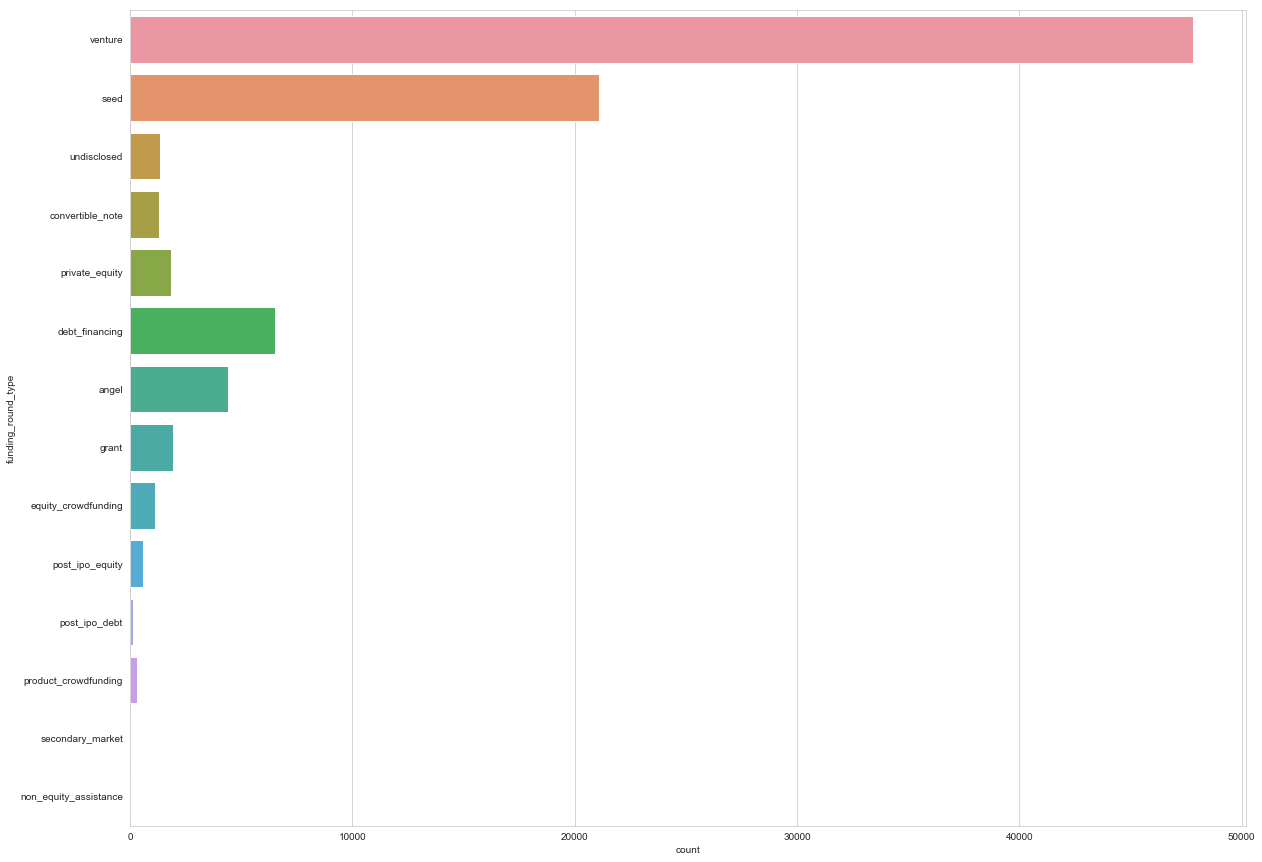

In [34]:
#overall investments in all 'funding_type'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# Plotting count across a categorical variable 
plt.figure(figsize=(20, 15))
sns.countplot(y="funding_round_type", data=master_frame)
plt.show()

In [35]:
#the rows with only 4 investment types: 
#in the question already mentioned about 4 types.
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [36]:
#Converting million by dividing 'raised_amount_usd' by 1000000.
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.000000,#fame,Media,IND
2,/organization/-qounter,seed,0.700000,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,0.043360,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN


In [37]:
#average investment amount for each of the four funding types.
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2)

funding_round_type
angel              0.97
private_equity    73.94
seed               0.75
venture           11.72
Name: raised_amount_usd, dtype: float64

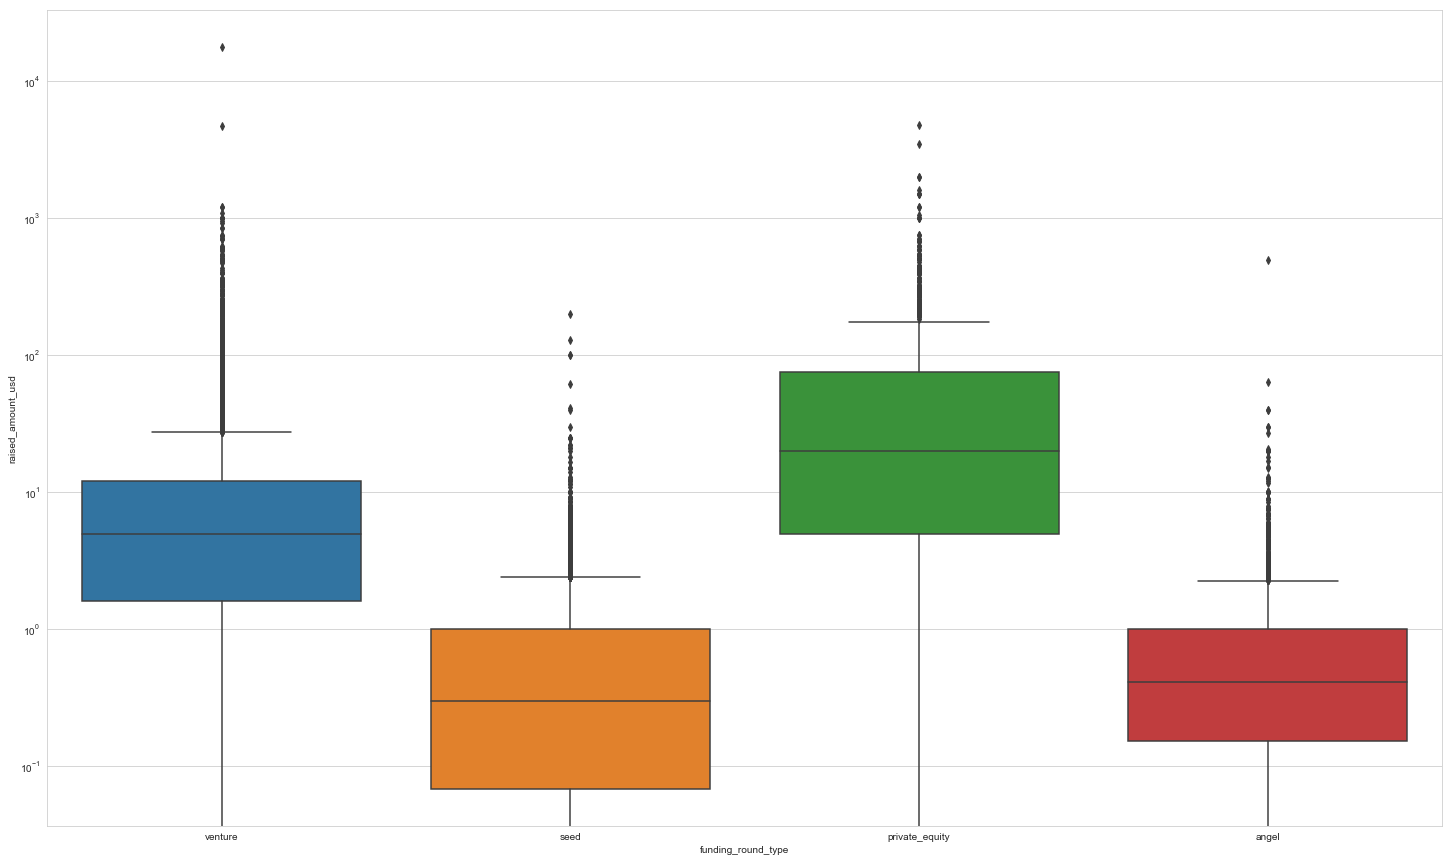

In [38]:
#plotting graph of each 4 funding type
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#restrict master_frame that contains only 4 funding type
master_frame=master_frame[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]
plt.figure(figsize=(25,15))
sns.boxplot(x='funding_round_type',y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

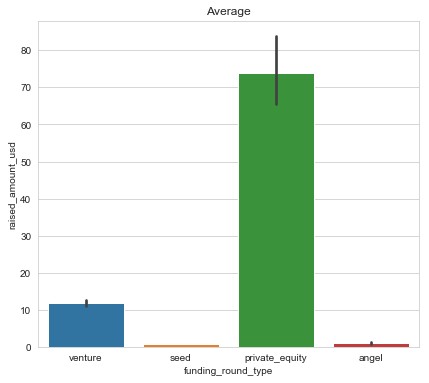

In [39]:
#average amount of investment in each funding type
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.title("Average")
plt.show()

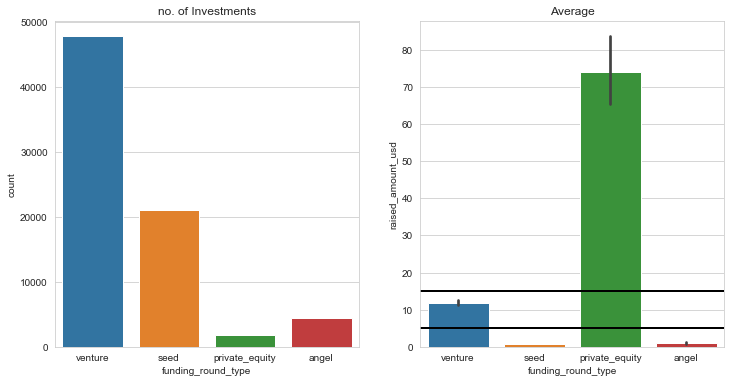

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("no. of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.mean)
plt.title("Average")
plt.axhline(y=5, linewidth=2, color = 'k')
plt.axhline(y=15, linewidth=2, color = 'k')
plt.show()
#this gives the fraction of total investments (globally) in venture, seed, and private equity, 
#and the average amount of investment in each funding type
#The 2 line indicates the investment amount between the 5-15 millions usd.

In [41]:
#rows with only 'venture'. 
#Spark Funds wants to invest between 5 to 15 million USD per investment 
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 

#Drop the column 'funding_round_type' as going to be 'venture'
master_frame = master_frame.drop(['funding_round_type'], axis = 1)

In [42]:
#master_frame.groupby('country_code')['raised_amount_usd'].sum()
#top9.sort_values(by='raised_amount_usd',ascending = False)
#print(top9.head(9)) 
#this method also provide the same values of top9 countries list.

In [43]:
#top9 countries list
#as Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type
top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)
top9 = top9.iloc[:9, ]#taking 'iloc' for position based indexing for top9 rows.
top9

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


In [44]:
#rows with only USA, GBR and IND 'country_code'.
#SparksFunds wants to invest in only top three English speaking countries.
top3 = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]
top3.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    420068.029342
GBR     20072.813004
IND     14261.508718
Name: raised_amount_usd, dtype: float64

In [45]:
#Extract the primary sector value
#as multiple sub-sectors are present we use '|' to seperate each sectors.
#first string before the vertical bar consider as primary_sector.
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [46]:
#Read mapping.csv file 
mapping = pd.read_csv('mapping.csv')
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)#regex=regular expresion for replacing value with na
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [47]:
#Reshape the mapping dataframe to merge with the master_frame dataframe. 
#Using melt() function to unpivot the table.
#melt()-merge DataFrame into a format where one or more columns are identifier variables, while all other columns 
#considered measured variables, are unpivoted to the row axis,leaving just two non-identifier columns, variable and value.
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                            'Social, Finance, Analytics, Advertising'])#merge dataframe with 8 main sectors as question asked for 8 main_sectors. 
#mapping=mapping[mapping.value!=0]same as [~(mapping.value==0)]
mapping = mapping[~(mapping.value == 0)]#select all entries where mapping value is not zero
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [48]:
#merging master_frame with mapping file
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,10.000000,#fame,Media,IND,Entertainment
1,/organization/0-6-com,2.000000,0-6.com,Curated Web,CHN,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN,Cleantech / Semiconductors
3,/organization/0xdata,20.000000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,1.700000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"


In [49]:
#primary sectors which have no main sectors in the master_frame
print(master_frame[master_frame.main_sector.isnull()].category_list.unique())

['Nanotechnology' 'English-Speaking' 'Navigation' 'Enterprise Hardware'
 'Natural Gas Uses' 'Natural Language Processing' 'Enterprise 2.0'
 'Adaptive Equipment' 'Racing' 'Specialty Retail'
 'Biotechnology and Semiconductor' 'Rapidly Expanding' 'Product Search'
 'GreenTech' 'Natural Resources' 'Retirement']


In [50]:
#Number of rows with NaN main_sector 
len(master_frame[master_frame.main_sector.isnull()])

190

In [51]:
#the rows which have main_sector values
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)

47619

In [52]:
#creating datafram#e d1,d2,d3 as spark Funds want to invest 5 to 15 millions usd in a seperate speaking english country 
#and containg the obsevation type.

In [53]:
#for country 1. creating dataframe as D1 for USA #i was getting warning after fetching the result so that in top declared suppres warnings.
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'].between(5,15))] #amount is between 5 to 15 millions usd
#grouping raised_amount_usd and main_sector to get the sum and counts by renaming the columns.
D1_mf = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D1 = D1.merge(D1_mf, how='left', on ='main_sector')
D1.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/0xdata,8.900000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",23807.376964,2714
1,/organization/1-mainstream,5.000000,1 Mainstream,Apps,USA,"News, Search and Messaging",13959.567428,1582
2,/organization/128-technology,11.999347,128 Technology,Service Providers,USA,Others,26321.007002,2950
3,/organization/1366-technologies,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799
4,/organization/1366-technologies,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799


In [54]:
#for country 2. creating dataframe for GBR(united kingdom)
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'].between(5,15) )]
D2_mf = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})#as per question asked to make seperate columns for total_amount and total_count
D2 = D2.merge(D2_mf, how='left', on ='main_sector')
D2.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/365scores,5.500000,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",1089.404014,133
1,/organization/7digital,8.468328,7digital,Content Creators,GBR,Entertainment,482.784687,56
2,/organization/7digital,10.000000,7digital,Content Creators,GBR,Entertainment,482.784687,56
3,/organization/90min,15.000000,90min,Media,GBR,Entertainment,482.784687,56
4,/organization/90min,5.800000,90min,Media,GBR,Entertainment,482.784687,56


In [55]:
#for country 3. creating dataframe for IND
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'].between(5,15))] 
D3_mf = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D3 = D3.merge(D3_mf, how='left', on ='main_sector')
D3.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/-fame,10.000000,#fame,Media,IND,Entertainment,280.830000,33
1,/organization/21diamonds-india,6.369507,21Diamonds,E-Commerce,IND,Others,1013.409507,110
2,/organization/a-little-world,6.410000,A LITTLE WORLD,Finance,IND,"Social, Finance, Analytics, Advertising",550.549550,60
3,/organization/adlabs-imagica,8.180000,Adlabs Imagica,Entertainment,IND,Entertainment,280.830000,33
4,/organization/agile,5.740000,Agile,Finance,IND,"Social, Finance, Analytics, Advertising",550.549550,60


In [56]:
#Total number of investments (count) for USA,GBR,IND
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12012
619
328


In [57]:
#Total amount of investment (USD) for USA,GBR,IND
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

107318.29
5365.23
2949.54


In [58]:
#Top sector, second-top, third-top from D1 (based on count of investments)
#Number of investments in the top, 2nd top, 3rd top sector in D1 'USA'
D1_mf

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                           1454.104361         167
Cleantech / Semiconductors                   21206.628192        2300
Entertainment                                 5099.197982         591
Health                                        8211.859357         909
Manufacturing                                 7258.553378         799
News, Search and Messaging                   13959.567428        1582
Others                                       26321.007002        2950
Social, Finance, Analytics, Advertising      23807.376964        2714

In [59]:
#Top sector, second-top, third-top from D2 (based on count of investments)
#Number of investments in the top, 2nd top, 3rd top sector in D2 'GBR'
D2_mf

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            167.051565          16
Cleantech / Semiconductors                    1150.139665         128
Entertainment                                  482.784687          56
Health                                         214.537510          24
Manufacturing                                  361.940335          42
News, Search and Messaging                     615.746235          73
Others                                        1283.624289         147
Social, Finance, Analytics, Advertising       1089.404014         133

In [60]:
#Top sector, second-top, third-top from D2 (based on count of investments)
#Number of investments in the top, 2nd top, 3rd top sector in D3 'IND'
D3_mf

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            136.900000          13
Cleantech / Semiconductors                     165.380000          20
Entertainment                                  280.830000          33
Health                                         167.740000          19
Manufacturing                                  200.900000          21
News, Search and Messaging                     433.834545          52
Others                                        1013.409507         110
Social, Finance, Analytics, Advertising        550.549550          60

In [61]:
#For the top sector USA ,company received highest investment
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False)
print(company.head())

                                   raised_amount_usd
company_permalink                                   
/organization/virtustream                  64.300000
/organization/capella                      54.968051
/organization/airtight-networks            54.201907
/organization/decarta                      52.100000
/organization/black-duck-software          51.000000


In [62]:
#For the 2nd top sector USA ,company received highest investment
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False)
print(company.head())

                           raised_amount_usd
company_permalink                           
/organization/shotspotter          67.933006
/organization/demandbase           63.000000
/organization/intacct              61.800000
/organization/netbase              60.600000
/organization/lotame               59.700000


In [63]:
#For the 3rd top sector USA , company received highest investment
company = D1[D1['main_sector']=='Cleantech / Semiconductors']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False)
print(company.head())

                             raised_amount_usd
company_permalink                             
/organization/biodesix               75.300000
/organization/tigo-energy            68.739496
/organization/forsight-labs          61.300001
/organization/rheonix                56.124758
/organization/scienergy              55.375423


In [64]:
#For the top sector GBR ,company received highest investment
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False)
print(company.head())


                                       raised_amount_usd
company_permalink                                       
/organization/electric-cloud                   37.000000
/organization/sensage                          36.250000
/organization/enigmatic                        32.500000
/organization/silverrail-technologies          29.000000
/organization/opencloud                        27.972766


In [65]:
#For the 2nd top sector GBR ,company received highest investment
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False)
print(company.head())

                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies          37.500000
/organization/mythings                       34.000000
/organization/zopa                           32.900000
/organization/imagini                        28.550000
/organization/marketinvoice                  25.553007


In [66]:
#For the 3rd top sector GBR ,company received highest investment
company = D2[D2['main_sector']=='Cleantech / Semiconductors']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False)
print(company.head())

                                                    raised_amount_usd
company_permalink                                                    
/organization/eusa-pharma                                   35.600000
/organization/horizon-discovery                             31.353719
/organization/f-star-biotechnologische-forschun...          29.132906
/organization/elixent                                       25.000000
/organization/takeda-cambridge                              22.340000


In [67]:
#For the top sector IND , company received highest investment
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False)
print(company.head())

                                raised_amount_usd
company_permalink                                
/organization/firstcry-com                   39.0
/organization/myntra                         38.0
/organization/commonfloor                    32.9
/organization/pepperfry-com                  28.0
/organization/itzcash-card-ltd               25.0


In [68]:
#For the 2nd top sector IND , company received highest investment
company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False)
print(company.head())

                                          raised_amount_usd
company_permalink                                          
/organization/manthan-systems                      50.70000
/organization/komli-media                          28.00000
/organization/shopclues-com                        25.00000
/organization/intarvo                              21.90000
/organization/grameen-financial-services           21.55605


In [69]:
#For the 3r top sector IND , company received highest investment
company = D3[D3['main_sector']=='News, Search and Messaging']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False)
print(company.head())

                                                raised_amount_usd
company_permalink                                                
/organization/gupshup-technology-india-pvt-ltd               33.0
/organization/imimobile                                      23.0
/organization/sms-gupshup                                    22.0
/organization/roadrunnr                                      21.0
/organization/hike                                           21.0


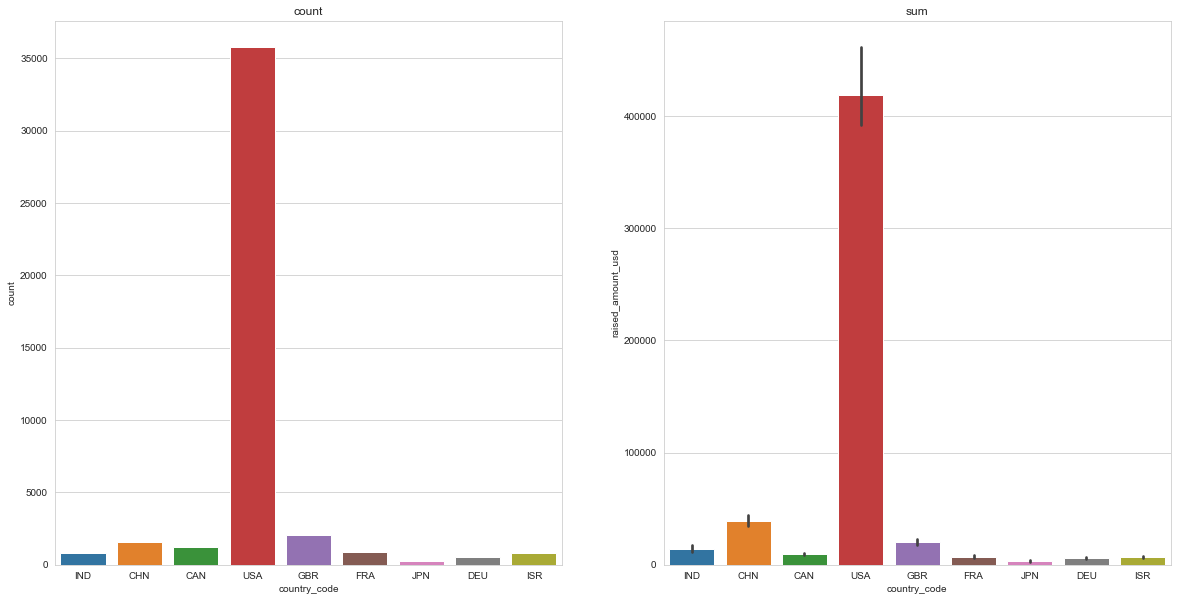

In [70]:
#Plotting sum across top9 country_code on the basis of amount_raised_usd
plt.figure(figsize=(20,10))
top9=master_frame[master_frame['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
plt.subplot(1,2,1) #subplot 1 for no. of counts
sns.countplot(x="country_code",data=top9)
plt.title('count')
plt.subplot(1,2,2)#subplot 2 for the sum of amount.
sns.barplot(x="country_code",y="raised_amount_usd", data=top9, estimator=sum)
plt.title('sum')
plt.show()

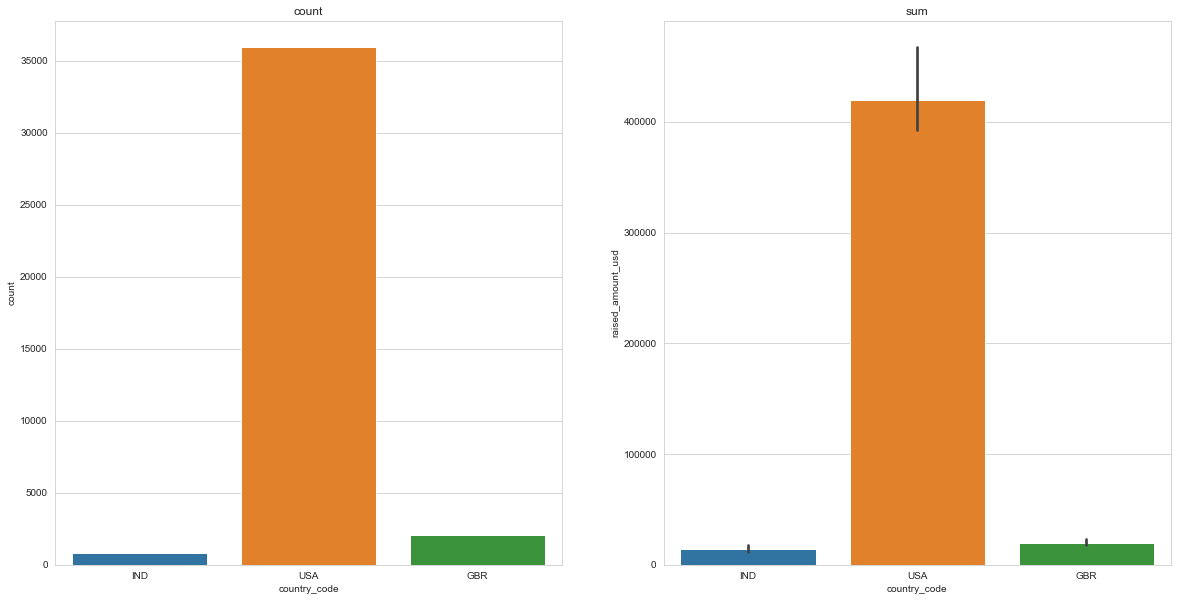

In [71]:
#Plotting sum across top 3 english official language country
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)#countries show top3 data
sns.countplot(x="country_code",data=top3) 
plt.title('count')
plt.subplot(1,2,2)#countries show sum of amount
sns.barplot(x="country_code",y="raised_amount_usd", data=top3, estimator=sum)
plt.title('sum')
plt.show()

<Figure size 720x720 with 0 Axes>

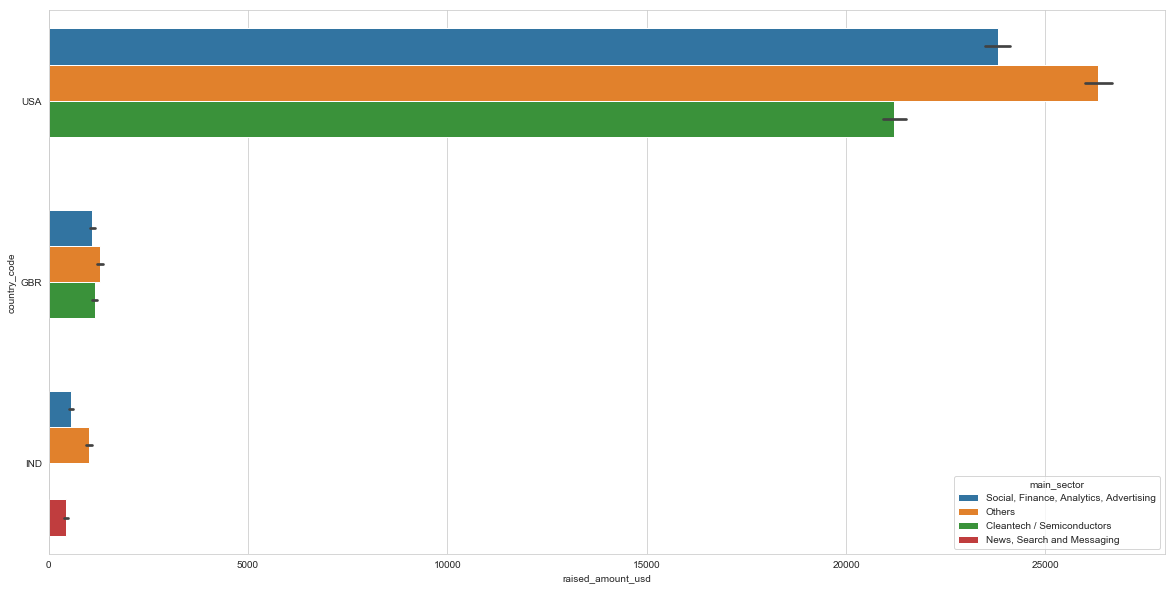

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
#seperating the top3(D1,D2,D3) countries 'main_sector' on the basis of highest investments.
D1 = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D2 = D2[D2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]
D3 = D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]
#creating a frame and plotting the graph of top3 sectors of the top3 countries.
t3 = [D1, D2, D3]
res = pd.concat(t3)
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=res, estimator=np.sum)
plt.show()